# PROJETO 

In [1]:
# PACOTES
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

# elimina as advertências
warnings.filterwarnings("ignore")

# função
def mape(actual, pred):
   return np.mean(np.abs((actual - pred) / actual)) * 100

# Tratamento dos dados

In [2]:
# carrega dataset
df = pd.read_csv("hist_consumo_tecido_new.csv")

# muda nome das colunas
df = df[["month", "sales"]]
df.columns = ["date", "demand"]

df["date"] = pd.to_datetime(df.date)
df.set_index(df.date, inplace = True) # definir uma Lista
df.sort_index(ascending = True, inplace = True) # ordena 
df.drop("date", axis = 1, inplace = True)

In [3]:
# Tipos de variáveis
df.dtypes

demand    int64
dtype: object

In [4]:
# Verifica se possui dados ausentes
df.isnull().sum()

demand    0
dtype: int64

In [5]:
# imprime as 17 primeiras linhas do dataset
df.head(17)

,demand
date,
2019-01-01,554
2019-02-01,590
2019-03-01,435
2019-04-01,408
2019-05-01,406
2019-06-01,512
2019-07-01,496
2019-08-01,629
2019-09-01,439


In [6]:
# imprime as 17 ultimas linhas do dataset
df.tail(17)

,demand
date,
2020-06-01,485
2020-07-01,518
2020-08-01,380
2020-09-01,386
2020-10-01,361
2020-11-01,353
2020-12-01,343
2021-01-01,329
2021-02-01,330


# ANÁLISE 

In [7]:
print("Número de linhas:", df.shape[0])
print("Número de colunas: ", df.shape[1])

Número de linhas: 34
Número de colunas:  1


TypeError: text() missing 2 required positional arguments: 'x' and 'y'

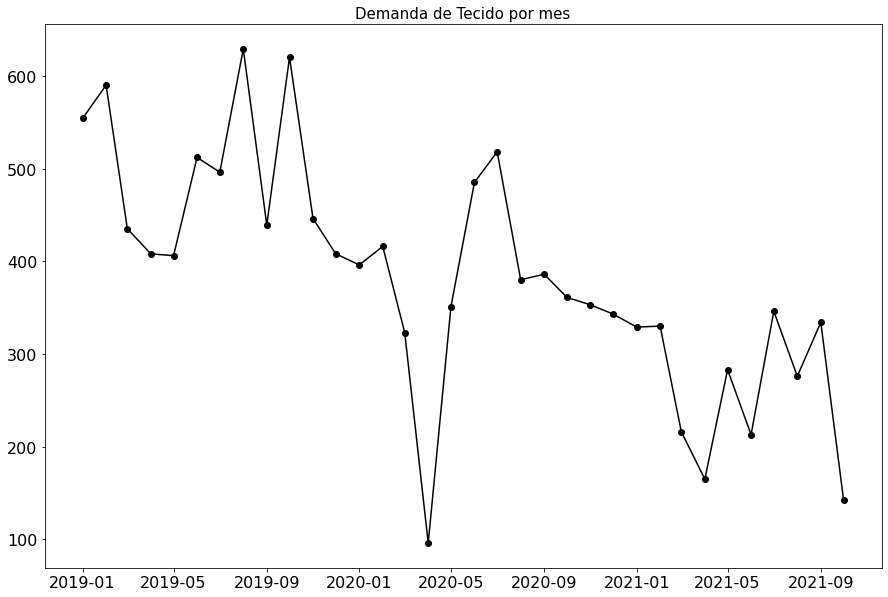

In [17]:
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(df.index, df.demand, color = "black", marker = "o")
ax.tick_params(labelsize = 16)
plt.title('Demanda de Tecido por mes',size=15)
plt.text(s = "Demanda de Tecido por ano", fontsize = 20, color = "gray", weight = "bold")
plt.show()

# Estatistica

A demanda média é 8686 e seu desvio padrão é 705.

A demanda de tecido em março de 2019 foi a mínima de 96.

A maior demanda foi de 629 em agosto de 2019.

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
demand,34.0,381.941176,128.213114,96.0,329.25,383.0,444.25,629.0


Buscando os melhores parâmetros
- ARIMA, o algoritmo que usarei recebe 3 parâmetros: p, d e q.
- Como queremos o melhor modelo, tentarei várias combinações.
- Mas como vou saber se um modelo é realmente bom? Analisando seus MAPEs. Mas o que é MAPE?
- MAPE (erro percentual médio absoluto): esta métrica representa a porcentagem de erro de um modelo, quanto menor, melhor

In [12]:
params = [
(2, 1, 1), (3, 1, 1), (4, 1, 1), (5, 1, 1),
(2, 1, 2), (3, 1, 2), (4, 1, 3), (5, 1, 3),
(1, 1, 4), (2, 1, 4), (3, 1, 4), (4, 1, 4),
(5, 1, 4), (10, 1, 1)]
 
for param in params:
   try:
      model = ARIMA(df.demand, order = param).fit()
      acc = mape(df.demand, model.predict(typ = "levels"))
      print("Order: ", param, "MAPE:", acc)
   except: 
      pass

Order:  (2, 1, 1) MAPE: 26.81822444742395
Order:  (3, 1, 1) MAPE: 26.01080839139313
Order:  (4, 1, 1) MAPE: 25.86054510549883
Order:  (5, 1, 1) MAPE: 25.369933960779
Order:  (2, 1, 2) MAPE: 26.557778973940145
Order:  (4, 1, 3) MAPE: 23.44115864095697
Order:  (5, 1, 3) MAPE: 25.253532410213293
Order:  (1, 1, 4) MAPE: 22.02013700388279
Order:  (2, 1, 4) MAPE: 23.429463849334013
Order:  (3, 1, 4) MAPE: 22.44663570663768
Order:  (4, 1, 4) MAPE: 22.31215937111651
Order:  (5, 1, 4) MAPE: 22.081750985406796
Order:  (10, 1, 1) MAPE: 19.744104753802375


In [13]:
# TREINANDO O MODELO
model = ARIMA(df.demand, order = (10, 1, 1)).fit()
acc = mape(df.demand, model.predict(typ = "levels"))
print("Porcentagem de erro da média absoluta: ", acc)

Porcentagem de erro da média absoluta:  19.744104753802375


Valores reais x Previsões

Este gráfico mostra uma comparação entre os valores reais e as previsões feitas pelo modelo.

Você pode notar que eles não são iguais, e isso é bom. Isso significa que nosso modelo não está sobreajuste (quando um modelo não pode ter um bom desempenho em dados não vistos).

TypeError: text() missing 2 required positional arguments: 'x' and 'y'

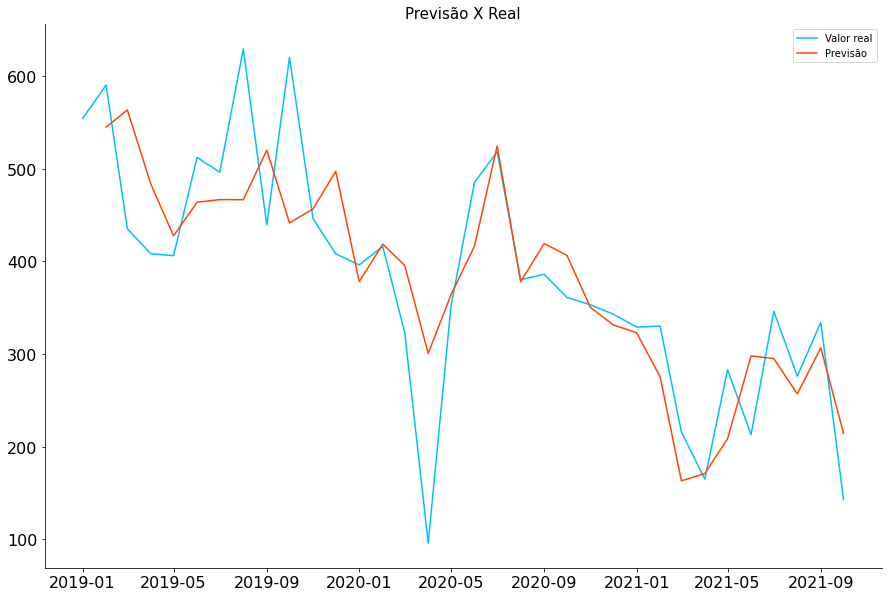

In [16]:
fig, ax = plt.subplots(figsize = (15, 10))
actual = ax.plot(df.demand, color = "deepskyblue")
pred = ax.plot(model.predict(typ = "levels"), color = "orangered")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
plt.title('Previsão X Real',size=15)
plt.legend(['Valor real','Previsão'])
plt.text(s = "Actual Vs. Predicted Values", fontsize = 24, weight = "bold", color = "gray")
plt.text(s = "Atual", color = "deepskyblue", fontsize = 15)
plt.text(s = "Previsto", color = "orangered", fontsize = 15)
 
plt.show()